## Delivery Time


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
upload = files.upload()

Saving delivery_time.csv to delivery_time.csv


In [3]:
delivery = pd.read_csv('delivery_time.csv')
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
delivery.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [5]:
delivery.shape

(21, 2)

In [6]:
delivery['Sorting Time'].value_counts()

7     4
10    3
4     3
6     3
3     3
9     2
8     1
2     1
5     1
Name: Sorting Time, dtype: int64

As the data is low we cannot get good accuracy out of this dataset, but we can check if the model is efficient

In [7]:
#checking null values
delivery.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [8]:
#checking duplicated rows
delivery[delivery.duplicated()]

,Delivery Time,Sorting Time


(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

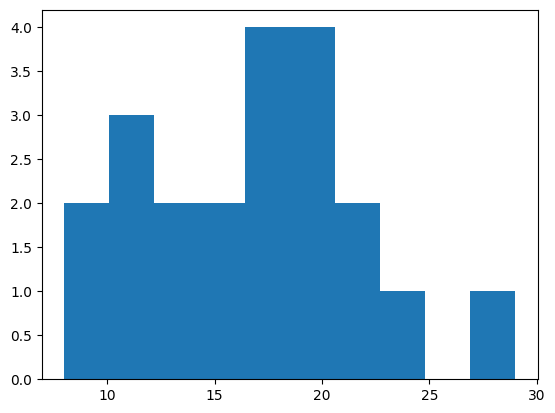

In [9]:
plt.hist(delivery['Delivery Time'])

In [10]:
delivery['Delivery Time'].skew()

0.3523900822831107

In [11]:
delivery['Sorting Time'].skew()

0.047115474210530174

In [12]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


Visualization

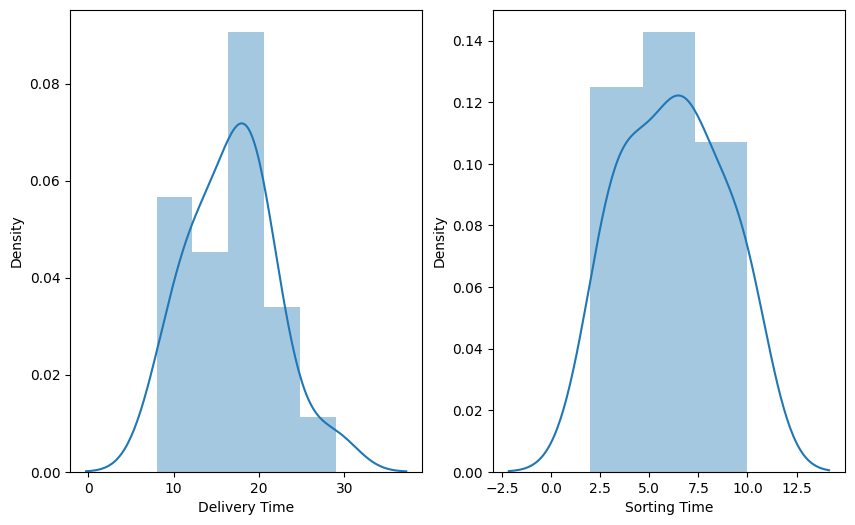

In [13]:
plt.subplots(figsize = (10,6))

plt.subplot(1,2,1)
sns.distplot(delivery['Delivery Time'])

plt.subplot(1,2,2)
sns.distplot(delivery['Sorting Time'])

plt.show()

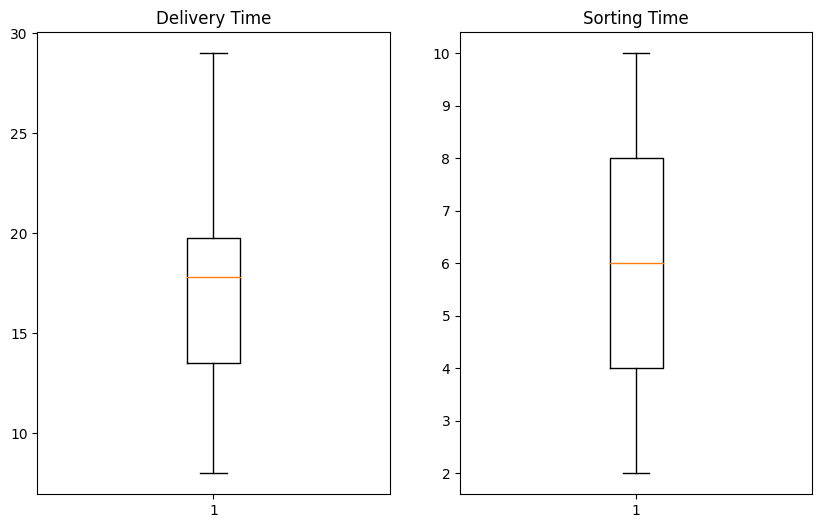

In [14]:
plt.subplots(figsize = (10,6))

plt.subplot(1,2,1)
plt.title('Delivery Time')
plt.boxplot(delivery['Delivery Time'])

plt.subplot(1,2,2)
plt.title('Sorting Time')
plt.boxplot(delivery['Sorting Time'])

plt.show()

In The above box plot we can say that There is no outliers in the given dataset

In [15]:
delivery.rename(columns={'Delivery Time': 'Delivery_Time', 'Sorting Time': 'Sorting_Time'}, inplace=True)

<Axes: xlabel='Delivery_Time', ylabel='Sorting_Time'>

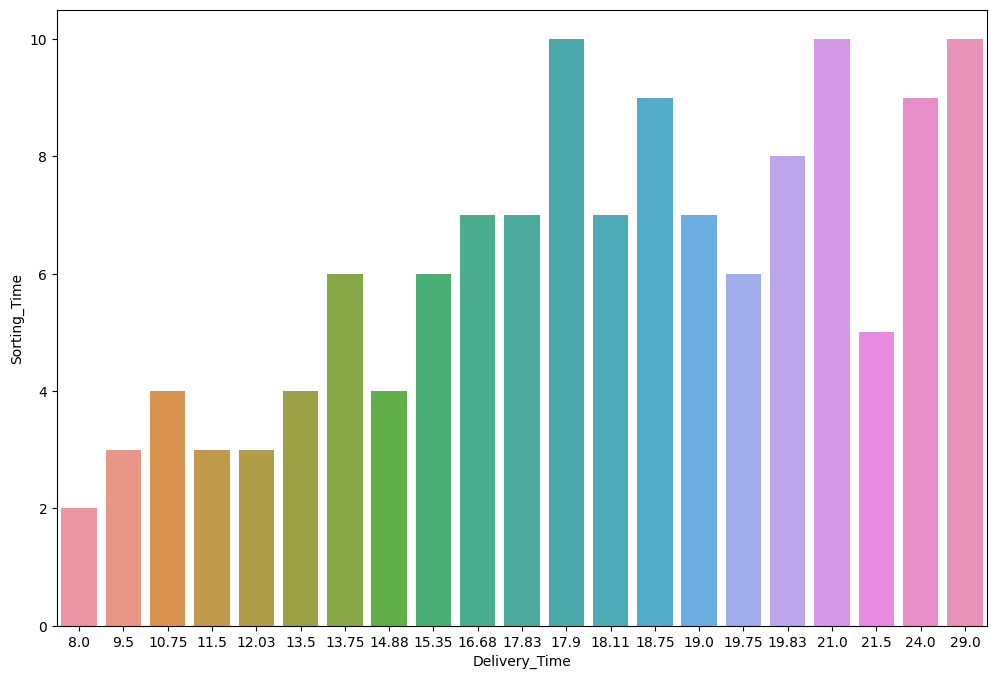

In [16]:
plt.figure(figsize = (12,8))
sns.barplot(y='Sorting_Time',x='Delivery_Time',data=delivery)

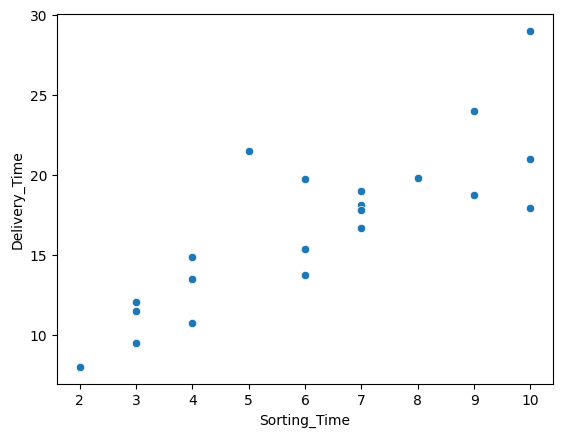

In [17]:
sns.scatterplot(x=delivery['Sorting_Time'],y=delivery['Delivery_Time'],data=delivery)
plt.show()

In [19]:
delivery.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [20]:
correlation_matrix = delivery.corr()

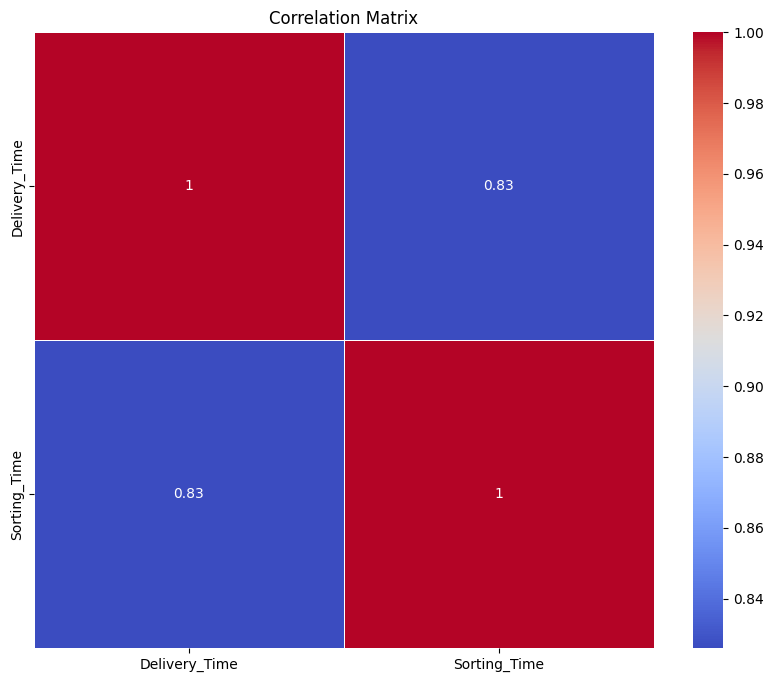

In [21]:
#heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [22]:
#they are asking to predict delivery time which is y and sorting time which is x
y = delivery.iloc[:,0]
X = delivery.iloc[:,1].values.reshape(-1,1)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14, 1), (7, 1), (14,), (7,))

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

<Axes: xlabel='Delivery_Time', ylabel='Sorting_Time'>

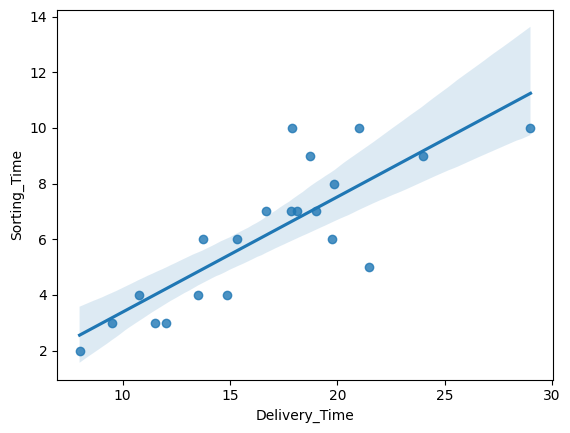

In [26]:
sns.regplot(x='Delivery_Time',y='Sorting_Time',data=delivery)

In [27]:
y_pred_test = model.predict(X_test)
y_pred_test

array([24.13956522, 10.3847271 , 14.31468085, 12.34970398, 12.34970398,
       20.20961147, 10.3847271 ])

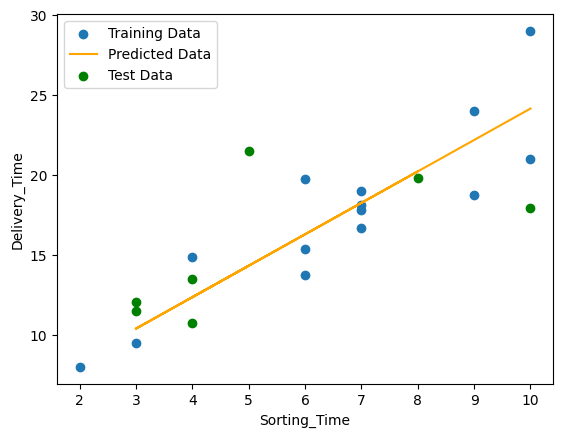

In [28]:
plt.scatter(X_train,y_train,label='Training Data')
plt.plot(X_test,y_pred_test,color='Orange',label='Predicted Data')
plt.scatter(X_test,y_test,color='Green',label='Test Data')

plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')
plt.legend()
plt.show()

In [29]:
y_test

8     17.90
13    11.50
20    21.50
1     13.50
11    10.75
10    19.83
14    12.03
Name: Delivery_Time, dtype: float64

In [30]:
y_pred_train = model.predict(X_train)
y_pred_train

array([ 8.41975023, 18.2446346 , 18.2446346 , 24.13956522, 16.27965772,
       16.27965772, 16.27965772, 22.17458834, 10.3847271 , 18.2446346 ,
       22.17458834, 24.13956522, 12.34970398, 18.2446346 ])

In [31]:
y_train

18     8.00
6     19.00
19    17.83
4     29.00
2     19.75
5     15.35
16    13.75
9     18.75
7      9.50
17    18.11
3     24.00
0     21.00
15    14.88
12    16.68
Name: Delivery_Time, dtype: float64

In [32]:
from sklearn.metrics import r2_score

In [33]:
R2_score_train = r2_score(y_train, y_pred_train )
R2_score_test = r2_score(y_test, y_pred_test)
print(R2_score_train,' ',R2_score_test)

0.7917489342165316   0.14161803297912778


As we can see the r2 score for the train and test data, train data has more accuracy but test data has very low accuracy, we can assume that the data is small due to small amount of data, we cannot make a good model for prediction.

Stats Model Formula

In [62]:
import statsmodels.formula.api as smf
model_ols = smf.ols("Sorting_Time~Delivery_Time",data = delivery).fit()
(model_ols.rsquared,model_ols.rsquared_adj)

(0.682271474841723, 0.6655489208860242)

Transformation 1

In [61]:
model_ols_1 = smf.ols("np.log(Sorting_Time)~np.log(Delivery_Time)",data=delivery).fit()
(model_ols_1.rsquared,model_ols_1.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

Transformation 2

In [63]:
model_ols_2 = smf.ols("np.square(Sorting_Time)~np.square(Delivery_Time)",data=delivery).fit()
(model_ols_2.rsquared,model_ols_2.rsquared_adj)

(0.5881883446986835, 0.5665140470512459)

Transformation 3

In [69]:
model_ols_3=smf.ols("np.log(Sorting_Time)~np.square(Delivery_Time)",data=delivery).fit()
(model_ols_3.rsquared,model_ols_3.rsquared_adj)

(0.5772111724467143, 0.5549591288912782)

Transformation 4

In [70]:
model_ols_4=smf.ols("np.square(Sorting_Time)~np.log(Delivery_Time)",data=delivery).fit()
(model_ols_4.rsquared,model_ols_4.rsquared_adj)

(0.6213305170538341, 0.6014005442671939)

As we can see in model_ols_1 is the only model that is good fit for this data


## Salary Hike




In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [72]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [73]:
salary = pd.read_csv('Salary_Data.csv')
salary.shape

(30, 2)

In [74]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Preprocessing

In [75]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [78]:
salary[salary.duplicated()]

,YearsExperience,Salary


In [76]:
salary[salary.duplicated()].shape

(0, 2)

In [77]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


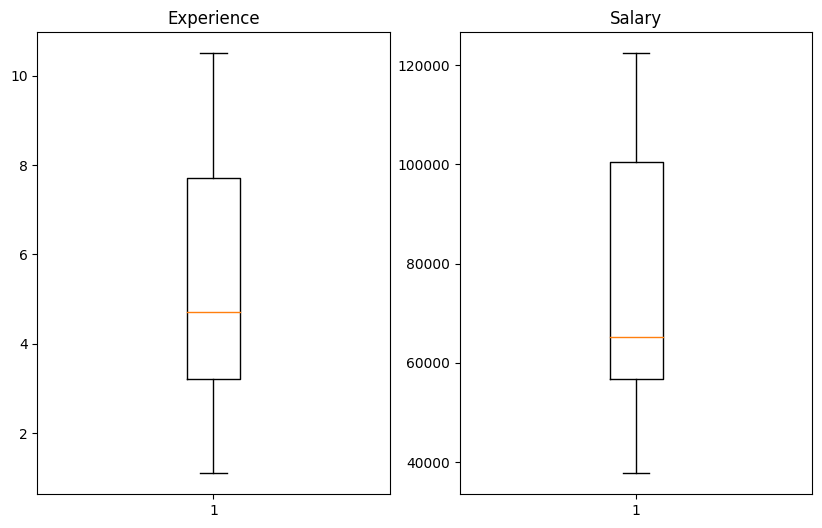

In [79]:
#finding outliers using boxplot visualization
plt.subplots(figsize=(10,6))

plt.subplot(1,2,1)
plt.title('Experience')
plt.boxplot(salary['YearsExperience'])

plt.subplot(1,2,2)
plt.title('Salary')
plt.boxplot(salary['Salary'])

plt.show()

As we can wee there is no outliers in the above boxplot


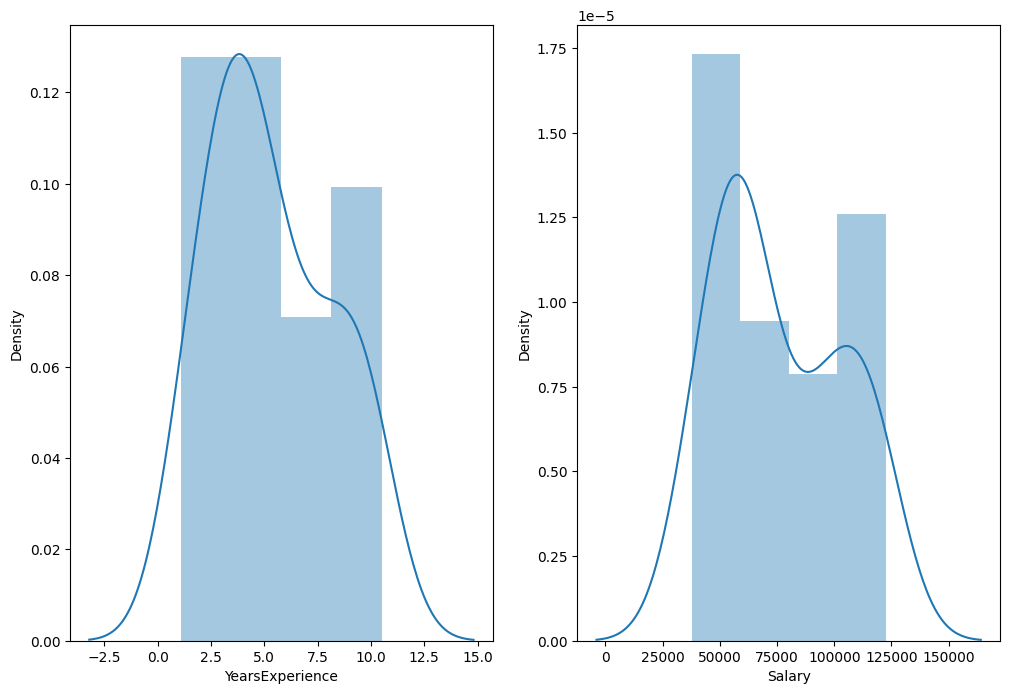

In [80]:
plt.subplots(figsize = (12,8))

plt.subplot(1,2,1)
sns.distplot(salary['YearsExperience'])

plt.subplot(1,2,2)
sns.distplot(salary['Salary'])

plt.show()

In [81]:
salary.rename(columns={'YearsExperience': 'Experience', 'Salary': 'Salary'}, inplace=True)

In [82]:
salary_corr = salary.corr()
salary_corr

,Experience,Salary
Experience,1.000000,0.978242
Salary,0.978242,1.000000


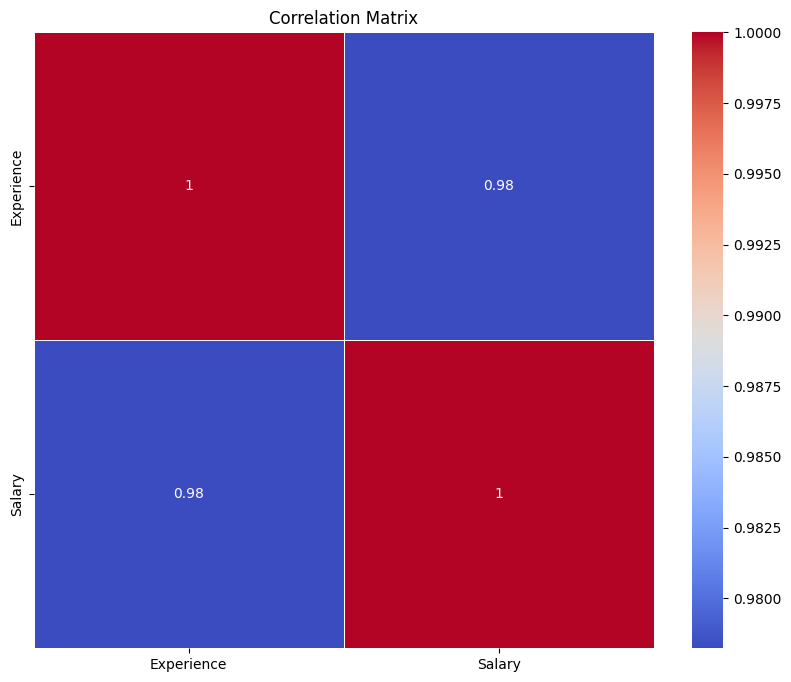

In [83]:
plt.figure(figsize=(10, 8))
sns.heatmap(salary_corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

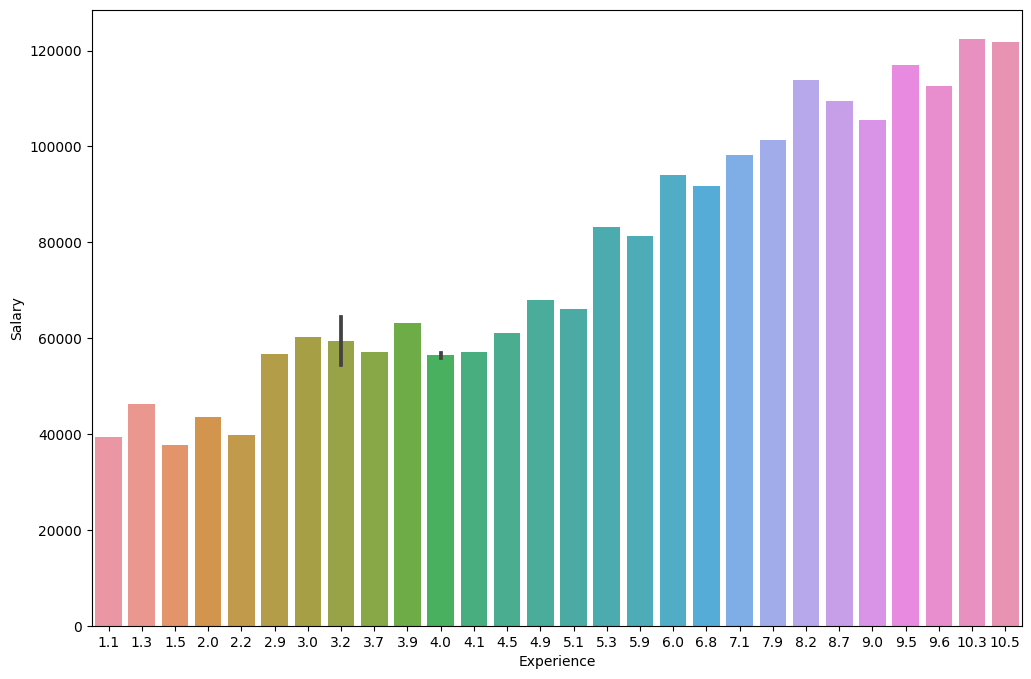

In [84]:
plt.figure(figsize = (12,8))
sns.barplot(y='Salary',x='Experience',data=salary)
plt.show()

<Axes: xlabel='Experience', ylabel='Salary'>

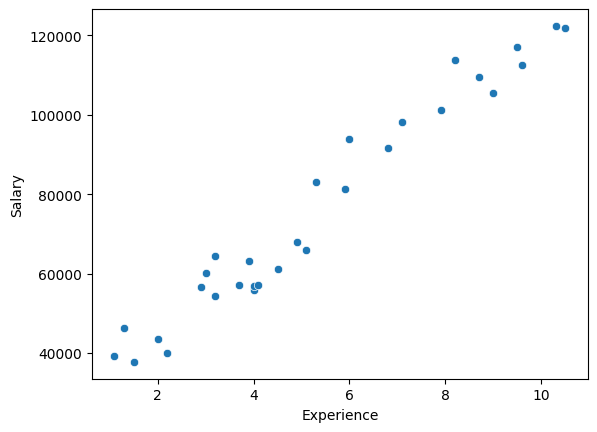

In [85]:
sns.scatterplot(x='Experience', y='Salary',data=salary)

In [87]:
X = salary['Experience'].values.reshape(-1,1)
y = salary['Salary']

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14, 1), (7, 1), (14,), (7,))

In [88]:
from sklearn.linear_model import LinearRegression
lnrmodel = LinearRegression()
lnrmodel.fit(X_train,y_train)

LinearRegression()

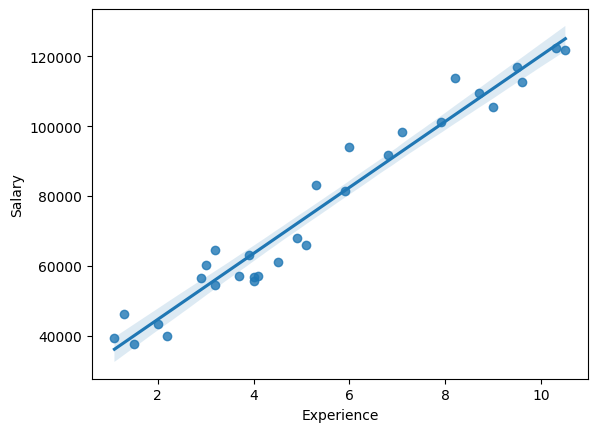

In [89]:
sns.regplot(x='Experience',y='Salary',data=salary)
plt.show()

In [90]:
y_pred_test = lnrmodel.predict(X_test)
y_pred_test

array([24.13956522, 10.3847271 , 14.31468085, 12.34970398, 12.34970398,
       20.20961147, 10.3847271 ])

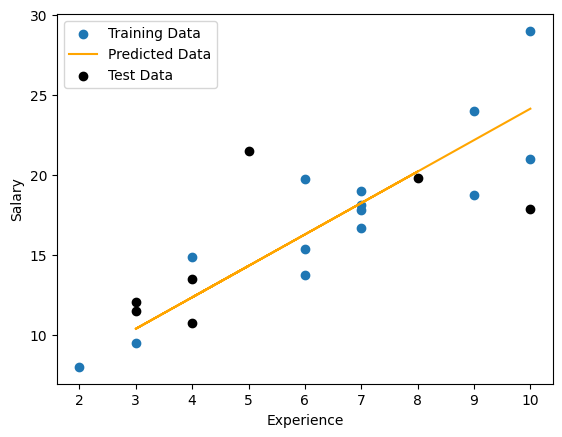

In [91]:
plt.scatter(X_train,y_train,label='Training Data')
plt.plot(X_test,y_pred_test,color='Orange',label='Predicted Data')
plt.scatter(X_test,y_test,color='Black',label='Test Data')

plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [92]:
y_test

8     17.90
13    11.50
20    21.50
1     13.50
11    10.75
10    19.83
14    12.03
Name: Delivery_Time, dtype: float64

In [93]:
y_pred_train = lnrmodel.predict(X_train)
y_pred_train

array([ 8.41975023, 18.2446346 , 18.2446346 , 24.13956522, 16.27965772,
       16.27965772, 16.27965772, 22.17458834, 10.3847271 , 18.2446346 ,
       22.17458834, 24.13956522, 12.34970398, 18.2446346 ])

In [94]:
y_train.array

<PandasArray>
[  8.0,  19.0, 17.83,  29.0, 19.75, 15.35, 13.75, 18.75,   9.5, 18.11,  24.0,
  21.0, 14.88, 16.68]
Length: 14, dtype: float64

In [95]:
from sklearn.metrics import r2_score

In [96]:
R2_score_train = r2_score(y_train, y_pred_train )
R2_score_test = r2_score(y_test, y_pred_test)
print('Accuracy for train :',R2_score_train,' ','Accuracy for test :',R2_score_test)

Accuracy for train : 0.7917489342165316   Accuracy for test : 0.14161803297912778


As we can see the Accuracy for the train and test, accuracy for the test data is greater than accuracy for the train data, so that we can say that this model is good fit and aslo we can use it for future prediction

Stats Model

In [97]:
import statsmodels.formula.api as smf
model_ols = smf.ols("Experience~Salary",data = salary).fit()
(model_ols.rsquared,model_ols.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

Transformation 1

In [99]:
model_ols_1 = smf.ols("np.log(Experience)~np.log(Salary)",data = salary).fit()
(model_ols_1.rsquared,model_ols_1.rsquared_adj)

(0.9052150725817153, 0.9018298966024908)

Transformation 2

In [101]:
model_ols_2 = smf.ols("np.square(Experience)~np.square(Salary)",data = salary).fit()
(model_ols_2.rsquared,model_ols_2.rsquared_adj)

(0.9540880842110778, 0.9524483729329021)

Transformation 3

In [102]:
model_ols_3 = smf.ols("np.log(Experience)~np.square(Salary)",data = salary).fit()
(model_ols_3.rsquared,model_ols_3.rsquared_adj)

(0.7859028145287481, 0.7782564864762034)

Transformation 4

In [103]:
model_ols_4 = smf.ols("np.square(Experience)~np.log(Salary)",data = salary).fit()
(model_ols_4.rsquared,model_ols_4.rsquared_adj)

(0.8386432990656718, 0.8328805597465887)

As We can see that model_ols & model_ols_2 has the high accuracy campared to other transformation so that we can say that model_ols & model_ols_2 is the best fit